## **<font color='light blue'>InSAR time series workflow</font>**
### **<font color='green'>Download+Prep</font>** {Aria-tools or ASF Hyp3} **and <font color='orange'>time series</font>** {MintPy}

M Tan (mtan@usgs.gov) created 3/13/2024

*Compiled and adapted from:*

> Aria tools jupyter notebooks: https://github.com/aria-tools/ARIA-tools-docs

> ASF Hyp3 documentations

> MintPy documentation

***

### <font color='green'>Download+prep data for MintPy options:</font>

#### 1. Aria-tools 

##### *NOTE: MT having issues downloading files post Feb 2023*

- a.) ariaAOIassist.py: https://nbviewer.org/github/aria-tools/ARIA-tools-docs/blob/master/JupyterDocs/ariaAOIassist/ariaAOIassist_tutorial.ipynb
- b.) ariaDownload.py
- c.) ariaPlot.py
- d.) ariaExtract.py
- e.) ariaTSsetup.py
- f.) aria_prep.py

#### 2. ASF Hyp3

##### *NOTE: MT recommended*

- a.) Download data from ASF Vertex website
- b.) Prepare_HyP3_InSAR_Stack_for_MintPy: https://github.com/ASFOpenSARlab/opensarlab-notebooks/blob/master/SAR_Training/English/Master/Prepare_HyP3_InSAR_Stack_for_MintPy.ipynb
- Overview: https://nbviewer.org/github/ASFHyP3/hyp3-docs/blob/main/docs/tutorials/hyp3_insar_stack_for_ts_analysis.ipynb

### <font color='orange'>Time series using MintPy</font>
- smallbaseline_app.py

***

In [1]:
#Import packages and modules for all workflow

import os, copy
import glob
import shutil
import sys
from osgeo import gdal,osr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import opensarlab_lib as asfn
from typing import List, Union, Dict
from pathlib import Path
import re

# Enable GDAL/OGR exceptions
gdal.UseExceptions()

In [2]:
#Verify gdal version (should be >= 3)
!gdalinfo --version

GDAL 3.8.4, released 2024/02/08


***
## Option 1: Aria-tools
### a.) ariaAOIassist.py
#### search, view, download data

1. query scenes from ASF Vertex

![Screenshot 2024-03-14 at 12.42.10.png](<attachment:Screenshot 2024-03-14 at 12.42.10.png>)
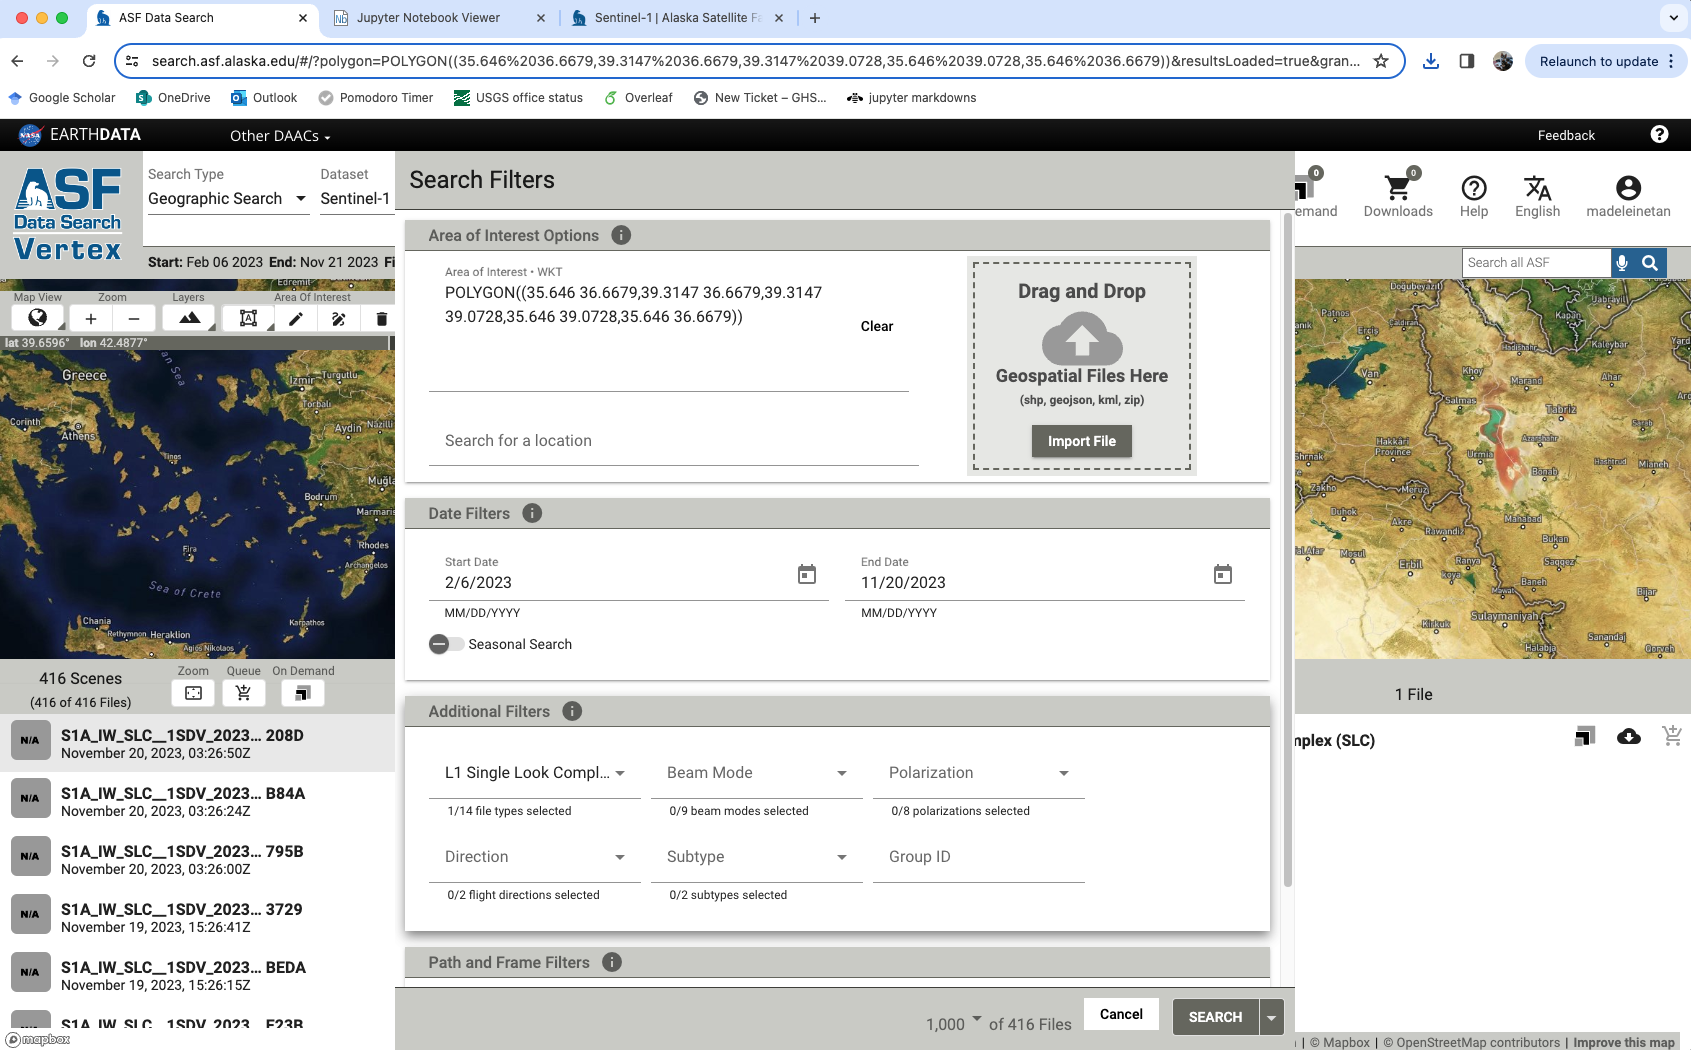

2. download scene info from query in ASF Vertex

![Screenshot 2024-03-14 at 12.42.30.png](<attachment:Screenshot 2024-03-14 at 12.42.30.png>)
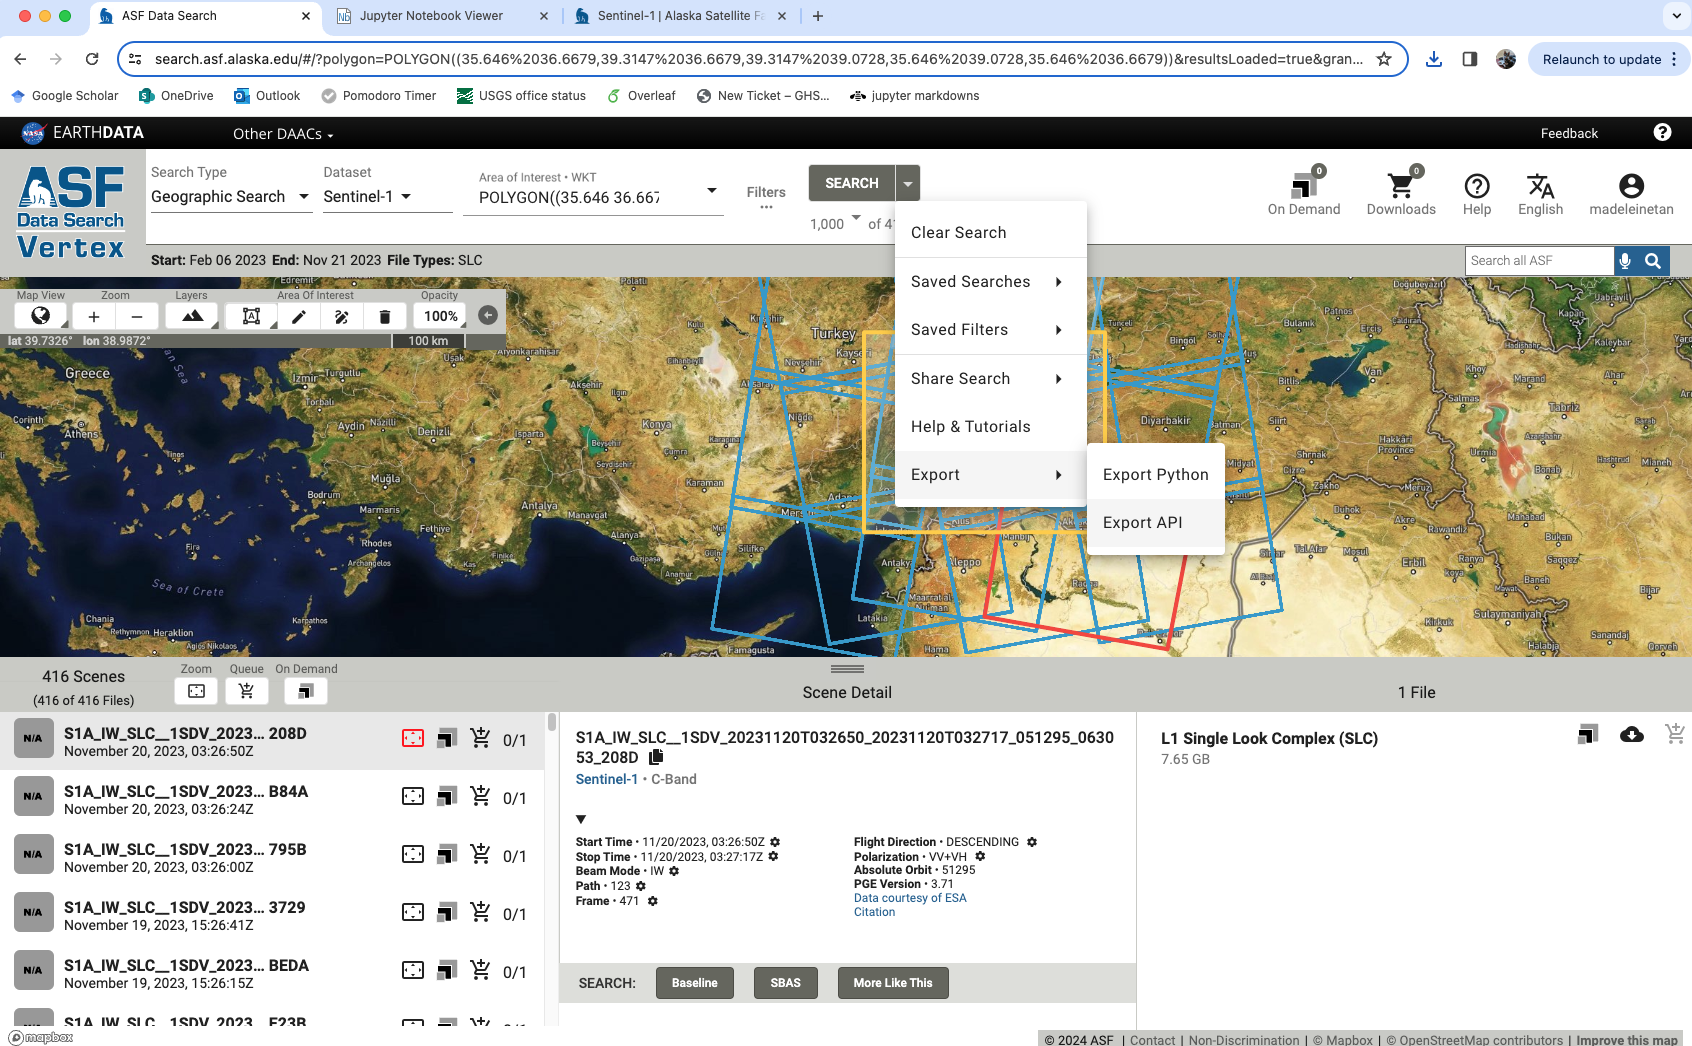

3. extract metadata using code

In [90]:
# Run ariaAOIassist.py
#Generates outputs for all tracks that overlap / within polygon specified in ASF Vertex query

!ariaAOIassist.py -f '/Users/mtan/Documents/Data/SSA24/mintpy/asf-datapool-results-2024-03-14_18-41-35.csv' -w work_dir

/Users/mtan/miniconda3/envs/mintpy/bin/ariaAOIassist.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
Generating outputs for track: 43
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Generating outputs for track: 14
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Generating outputs for track: 116
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Generating outputs for track: 21
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Generating outputs for track: 123
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Generating outputs for track: 94
The P

In [91]:
!ariaAOIassist.py -f '/Users/mtan/Documents/Data/SSA24/mintpy/asf-datapool-results-2024-03-14_18-41-35.csv' -t 43 -s 20230201 -e 20231130 -w '/Users/mtan/Documents/Data/SSA24/mintpy/Tr43_filtered' 

/Users/mtan/miniconda3/envs/mintpy/bin/ariaAOIassist.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
Generating outputs for track: 43
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Products generated.


In [24]:
#Convert .eps file to .png

from PIL import Image
import os

def eps2png(dir, name):
    eps_image = Image.open(os.path.join(work_dir+dir, name+'.eps'))
    eps_image.load(scale=3) #do not make >3, will receive oversized pixel error
    eps_image.save(os.path.join(work_dir+dir, name+'.png'))


eps2png('Tr94_filtered', 'D94_lat_extents')
eps2png('Tr123_filtered', 'D123_lat_extents')
eps2png('Tr21_filtered', 'D21_lat_extents')
eps2png('Tr116_filtered', 'A116_lat_extents')
eps2png('Tr14_filtered', 'A14_lat_extents')

In [14]:
# Define directories
#work_dir = '/Users/mtan/Documents/Data/SSA24/mintpy/'
work_dir = '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3IG/'
#assert work_dir == '/Users/mtan/Documents/Data/SSA24/mintpy/'

# Verify ARIA-tools is installed correctly
try:
    import ARIAtools.shapefile_util as shputil
except:
    raise Exception('ARIA-tools is missing from your PYTHONPATH')

In [8]:
## Defining the home and data directories at the processing location
"""
home_dir = os.getcwd()
tutorial_home_dir = os.path.abspath(os.path.join(home_dir, ""))
data_dir = os.path.join(tutorial_home_dir,'products')
print("home directory: ", tutorial_home_dir)
"""
default_dir = os.getcwd()

print("default dir: ", default_dir)
print("data dir: ", work_dir)

# Enable GDAL/OGR exceptions
gdal.UseExceptions()

default dir:  /Users/mtan/src/scripts
data dir:  /Users/mtan/Documents/Data/SSA24/mintpy/


### b.) ariaDownload.py

#### download data using Aria tools

In [16]:
!ariaDownload.py -t 116 -o count --ifg "20230228_20230312" -v 

/Users/mtan/miniconda3/envs/mintpy/bin/ariaDownload.py:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
Found -- 0 -- products


In [7]:
#!ariaDownload.py --track 21 --bbox '35.06 41.96 33.65 42.88' --start 20230206 --end 20231130 -o download -w '/Users/mtan/Documents/Data/SSA24/mintpy/21/' --verbose
!ariaDownload.py --track 116 --s 20230201 --bbox '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/boundingbox/TR116_bounds2.shp' -o url -w '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/boundingbox/' --verbose

/Users/mtan/miniconda3/envs/mintpy/bin/ariaDownload.py:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
Wrote -- 0 -- product urls to: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/boundingbox/track116_bbox35W35S43E42N_0.txt
INFO:ARIAtools:Wrote -- 0 -- product urls to: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/boundingbox/track116_bbox35W35S43E42N_0.txt


In [ ]:
#View data information

##Open netCDF file using GDAL##
fileName = os.path.join(data_dir, 'testdata/S1-GUNW-A-R-004-tops-20190124_20190112-230628-37654N_35778N-PP-2cb6-v2_0_2.nc') #data to load
ds = gdal.Open(fileName)

##Retrieve an overview of the file content##
dataInfo = gdal.Info(ds)
# printing the information to the screen
print(dataInfo)
# closing the product
ds = None

Driver: netCDF/Network Common Data Format
Files: /Users/mtan/Documents/Data/SSA24/mintpy/testdata/S1-GUNW-A-R-004-tops-20190124_20190112-230628-37654N_35778N-PP-2cb6-v2_0_2.nc
Size is 512, 512
Metadata:
  NC_GLOBAL#author=David Bekaert
  NC_GLOBAL#Conventions=CF-1.6
  NC_GLOBAL#institution=Jet Propulsion Laboratory
  NC_GLOBAL#ogr_geometry_field=productBoundingBox
  NC_GLOBAL#ogr_layer_name=productBoundingBox
  NC_GLOBAL#ogr_layer_type=POLYGON
  NC_GLOBAL#product_type=UNW GEO IFG
  NC_GLOBAL#references=https://aria.jpl.nasa.gov/
  NC_GLOBAL#source=Contains modified Copernicus Sentinel data processed by ESA and ARIA NASA/JPL
  NC_GLOBAL#title=ARIA standard product UNW GEO IFG
  NC_GLOBAL#version=1b
Subdatasets:
  SUBDATASET_1_NAME=NETCDF:"/Users/mtan/Documents/Data/SSA24/mintpy/testdata/S1-GUNW-A-R-004-tops-20190124_20190112-230628-37654N_35778N-PP-2cb6-v2_0_2.nc":productBoundingBox
  SUBDATASET_1_DESC=[1x465] productBoundingBox (8-bit character)
  SUBDATASET_2_NAME=NETCDF:"/Users/mtan/

In [ ]:
#View subdatasets within netcdf file

##Open and retrieve information of the unwrapped phase##
unwPhase = gdal.Open("NETCDF:"+fileName+":/science/grids/data/unwrappedPhase")
# retrieve the information for the variable
unwPhaseInfo = gdal.Info(unwPhase)
# print the information to the screen
print(unwPhaseInfo)

Driver: netCDF/Network Common Data Format
Files: /Users/mtan/Documents/Data/SSA24/mintpy/testdata/S1-GUNW-A-R-004-tops-20190124_20190112-230628-37654N_35778N-PP-2cb6-v2_0_2.nc
Size is 3934, 2253
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-78.535416666666663,37.654583333333335)
Pixel Size = (0.000833333333333,-0.000833333333333)
Metadata:
  /science/grids/data/crs#crs_wkt=GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"

In [ ]:
#View subdataset statistics
"""
GDAL has functionality which allows us to quickly calculate basic statistical properties of the data accounting for no-data values. 
First we will retrieve the RasterBand of the unwrapped phase after which we will use the GetStatistics() functionality to compute
the min, max, mean and standard deviation.
"""

stats = unwPhase.GetRasterBand(1).GetStatistics(0,1)
# print to the screen
print('Min: ', stats[0])
print('Max: ', stats[1])
print('Mean: ', stats[2])
print('Standard Dev.: ', stats[3])
# close the file
unwPhase = None

Min:  -18.87639045715332
Max:  31.708402633666992
Mean:  6.204519029029095
Standard Dev.:  6.033856962689841


In [ ]:
#Read subdataset into an array
#Generate a map plot

##Open and retrieve information of the unwrapped phase##
unwPhase = gdal.Open("NETCDF:"+fileName+":/science/grids/data/unwrappedPhase")

# loading the unwrapped phase into a numpy array
unwData = unwPhase.GetRasterBand(1).ReadAsArray()

# show the size of the array
print("Succesfully loaded the 'unwrappedPhase' sub-dataset into a Numpy array with size:")
print(unwData.shape)

Succesfully loaded the 'unwrappedPhase' sub-dataset into a Numpy array with size:
(2253, 3934)


In [ ]:
#Read subdataset into an array
#Generate a map plot

##Get Projection##
projection = osr.SpatialReference()
projection.ImportFromWkt(unwPhase.GetProjectionRef())

##Get corner coordinates##
ulLon, Lonres, Lonskew, ulLat, Latskew, Latres  = unwPhase.GetGeoTransform()
lrLon = ulLon + (unwPhase.RasterXSize * Lonres)
lrLat = ulLat + (unwPhase.RasterYSize * Latres)

###Let's round corner coordinates to the same number of digits as given in previous cell###
ulLon = np.round(ulLon,7)
ulLat = np.round(ulLat,7)
lrLon = np.round(lrLon,7)
lrLat = np.round(lrLat,7)

###Corner coordinates calculated in this cell###
print('''
Corner Coordinates calculated in this cell: ''',
'''Upper Left: ''', (ulLon,  ulLat),
'''Lower Left: ''', (ulLon,  lrLat),
'''Upper Right: ''', (lrLon,  ulLat),
'''Lower Right: ''', (lrLon,  lrLat), sep='\n')


Corner Coordinates calculated in this cell: 
Upper Left: 
(-78.5354167, 37.6545833)
Lower Left: 
(-78.5354167, 35.7770833)
Upper Right: 
(-75.2570833, 37.6545833)
Lower Right: 
(-75.2570833, 35.7770833)


In [ ]:
#Read subdataset into an array
#Generate a map plot
#Mask no data values and water bodies

##Get No Data Value##
NDV = unwPhase.GetRasterBand(1).GetNoDataValue()
# closing the file 
unwPhase = None

## Loading the connected component.
connComp = gdal.Open("NETCDF:"+fileName+":/science/grids/data/connectedComponents")
connCompData = connComp.GetRasterBand(1).ReadAsArray()
connComp = None


##Masking out the no-data
unwDataMasked = np.ma.masked_array(unwData, mask=unwData==NDV, fill_value=999999)
##Masking out connected component 0, which typically correspond to decorrelated area's such as water
unwDataMasked = np.ma.masked_array(unwDataMasked, mask=connCompData==0, fill_value=999999)

<urlopen error [Errno 8] nodename nor servname provided, or not known><urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlope

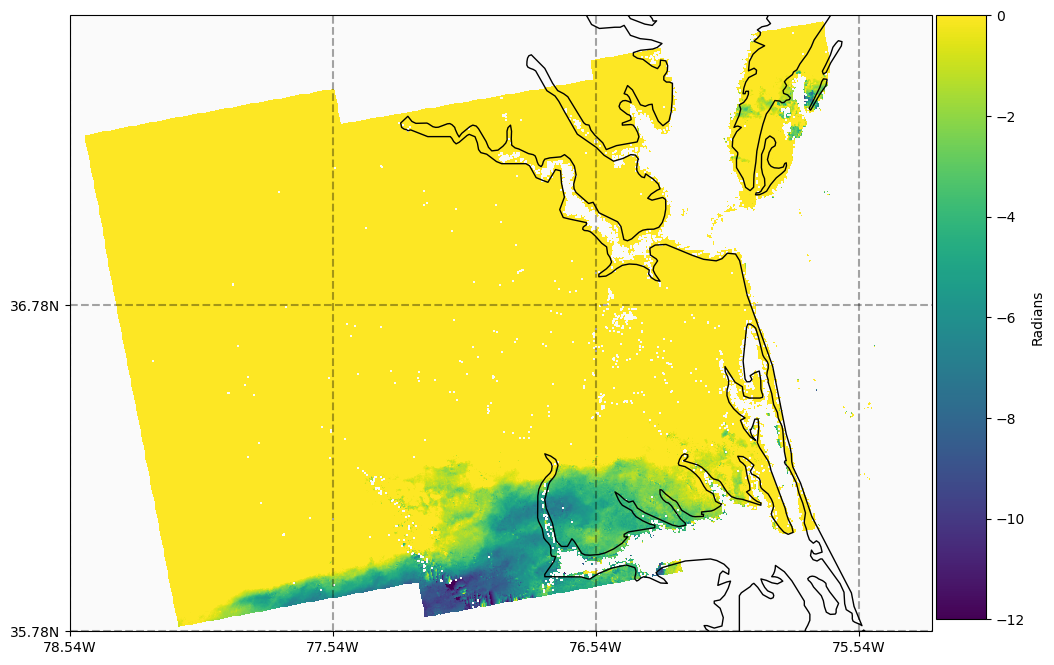

In [ ]:
#Read subdataset into an array
#Generate a map plot

import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

basemap   = cimgt.Stamen('terrain-background')
#######The plot extend is image corners###########
WESN      = [ulLon, lrLon, lrLat, ulLat]
fig, axes = plt.subplots(figsize=(20,8), subplot_kw={'projection':basemap.crs})
axes.set_extent(WESN, ccrs.Geodetic())
axes.add_image(basemap, 10)
axes.coastlines()
im = axes.imshow(unwDataMasked, cmap='viridis', vmin=-12, vmax=0, zorder=1, extent=WESN, origin = 'upper', transform=ccrs.PlateCarree())
cbar_ax   = fig.add_axes([0.730, 0.125, 0.025, 0.755])
fig.colorbar(im, cbar_ax, label='Radians', spacing='proportional')
axes.set_xticks(np.arange(WESN[0], WESN[1], 1), crs=ccrs.PlateCarree())
axes.set_yticks(np.arange(WESN[2], WESN[3], 1), crs=ccrs.PlateCarree())
axes.grid(linewidth=1.5, color='black', alpha=0.35, linestyle='--', zorder=2)
lon_formatter = LongitudeFormatter(number_format='.2f', degree_symbol='')
lat_formatter = LatitudeFormatter(number_format='.2f', degree_symbol='')
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)
plt.show()




### c.) ariaPlot.py

In [3]:
!ariaPlot.py -f "/Users/mtan/Documents/Data/SSA24/mintpy/testdata/*.nc" -plottracks

/Users/mtan/miniconda3/envs/mintpy/bin/ariaPlot.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
*****************************************************************
*** Plotting Function ***
*****************************************************************
Multi-core version
All (12) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (12) interferograms are spatially continuous.
Thread count specified for gdal multiprocessing = 2
- Make plot of track latitude extents vs bounding bbox/common track extent.


In [4]:
!ariaPlot.py -f "/Users/mtan/Documents/Data/SSA24/mintpy/testdata/*.nc" -plotbperpcoh

/Users/mtan/miniconda3/envs/mintpy/bin/ariaPlot.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
*****************************************************************
*** Plotting Function ***
*****************************************************************
Multi-core version
All (12) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (12) interferograms are spatially continuous.
Thread count specified for gdal multiprocessing = 2
- Make baseline plot that is color-coded with respect to mean IFG coherence.


The generated figure shows the unwrapped phase. As InSAR does not maintain a signal over water, we have masked it out using the connected component 0 as a proxy. You can see that the remaining land signal varies roughly up to 12 radians (~5.6 cm of line-of-sight displacement at C-band). Given the short temporal span of the interferogram (12-days) these signals can be mostly attributed to atmospheric noise.

### d.) ariaExtract.py
#### download DEMs, water masks

In [23]:
!ariaExtract.py -f '/Users/mtan/Documents/Data/SSA24/mintpy/14/*.nc'

/Users/mtan/miniconda3/envs/mintpy/bin/ariaExtract.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
*****************************************************************
*** Extract Product Function ***
*****************************************************************
Multi-core version
All (3) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (1) interferograms are spatially continuous.
No layers specified; only creating bounding box shapes
Thread count specified for gdal multiprocessing = 2


In [74]:
# option to control the use of pre-staged data; [False/True]
Use_Staged_Data = False

import subprocess
from osgeo import gdal, ogr
from matplotlib.ticker import FuncFormatter, FormatStrFormatter, StrMethodFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable  

if Use_Staged_Data:
    # Check if a stage file from S3 already exist, if not try and download it
    f = 'ariaExtract.zip'
    if not os.path.isfile(f):
        print('\nAttempting to download staged data ... ')
        try:
            cmd = f'aws s3 cp --region us-east-1 --no-sign-request s3://asf-jupyter-data/aria-data/{f} {f}'
            subprocess.run(cmd, shell=True, check=True)
                
        except:
            cmd = f'wget --no-check-certificate --no-proxy http://asf-jupyter-data-west.s3.amazonaws.com/aria-data/{f} {f} -q --show-progress'
            subprocess.run(cmd, stdout=None, stderr=subprocess.PIPE, shell=True)


    # verify if download was succesfull
    if os.path.isfile(f):
        if os.path.exists('products'):

            shutil.rmtree('products')
        !unzip {f}
        print('S3 pre-staged data retrieval was successful')
    else:
        print("Download outside openSarLabs is not supported.\nAs alternative please start from ARIA-tools with the commandline calls provided at the top of this notebook")          
else:
    print("Will not be using S3 pre-staged data")

Will not be using S3 pre-staged data


In [72]:
def plot_layer(path_layer, lay_type=None, cmap=None, **kwargs):
    """ 
        path_layers is a string to the GDAL compatible dataset to be plotted
    """
    
    if not lay_type: 
        lay_type = os.path.dirname(path_layer)
    title = [os.path.basename(lay_type)]
    
    ## get the lon lat bounds
    ds       = gdal.Open(path_layer, gdal.GA_ReadOnly)
    trans    = ds.GetGeoTransform()
    extent   = [trans[0], trans[0] + ds.RasterXSize * trans[1], trans[3] + ds.RasterYSize*trans[5], trans[3]]
    
    ## loading the data
    n_bands  = ds.RasterCount
    lst_arrs = []
    
    for band in range(n_bands):
        raster = ds.GetRasterBand(band+1)
        arr    = raster.ReadAsArray()
        try:
            NoData = raster.GetNoDataValue()
            arr = np.ma.masked_where((arr>1e20) |(arr==NoData),arr )
        except:
            print('Could not find a no-data value...')
            arr = np.ma.masked_where(arr>1e20,arr)
        
        lst_arrs.append(arr)

    ds = None
    if n_bands < 4:
        nrows = 1; ncols = n_bands
    else:
        raise Exception('Number of bands currently unsupported')
        
    
    ## initializing a figure
    fig, axes = plt.subplots(figsize=(12,9), ncols=ncols, nrows=nrows, sharex='col', sharey='row')
    axes = axes if isinstance(axes, np.ndarray) else np.array(axes)
    axe  = axes.ravel() 
    cmap = copy.copy(plt.cm.Greys_r)
    cmap.set_under('black')
    
    ## definging the plotting options for differnt layer types
    # Amplitude:
    if lay_type.endswith('amplitude'): 
        # will fix the maximum amplitude bound
        vmin=None
        vmax = 2000 
    # Coherence:
    elif lay_type.endswith('coherence'): 
        # has fixed range between 0-1
        vmin=0
        vmax = 1
    # Incidence angle:
    elif lay_type.endswith('incidenceAngle'): 
        vmin=None
        vmax=None
    # water
    elif lay_type.startswith('water'):
        # no bounds needed will be a 0/1 mask
        vmin=0
        vmax=1
        cmap='Greys'
    # deformation or unwrapped phase
    elif lay_type.startswith('defo'): 
        # let the data drive the bounds
        vmin=None
        vmax=None
        # change colormap to a warm type
        cmap=plt.cm.coolwarm
    elif lay_type.startswith('terr') or lay_type.startswith('topo'): 
        # let the data drive the bounds
        vmin=None
        vmax=None
        # change colormap to a warm type
        cmap=plt.cm.terrain
    elif lay_type == 'ENU':
        vmin=None
        vmax=None
        title = ['East', 'North', 'Up']
        fig.subplots_adjust(wspace=0.5)

    else:
        # let the data drive the bounds
        vmin=None
        vmax=None
        # change colormap to a warm type
        cmap=plt.cm.coolwarm
        
    # plotting the data    
    for i, ax in enumerate(axe):
        im   = ax.imshow(lst_arrs[i], cmap=cmap, vmin=vmin, vmax=vmax, extent=extent,interpolation='nearest')
        divider = make_axes_locatable(ax)
        cax     = divider.append_axes('right', size='5%', pad=0.25)
        if lay_type == 'ENU':
            fig.colorbar(im, cax=cax, format=FuncFormatter(lambda x, y: '{:.3f}'.format(x)))
        elif lay_type.startswith('water'):
            fig.colorbar(im, cax=cax, ticks=[vmin, vmax])
        else:
            fig.colorbar(im, cax=cax)

        ax.set_title(title[i], fontsize=15)
        ax.grid(False)

    axe[0].set_ylabel('latitude', labelpad=15, fontsize=15)
    axe[int(np.floor(n_bands/2))].set_xlabel('longitude', labelpad=15, fontsize=15)

In [69]:
#Downloading DEM

#!ariaExtract.py -f "/Users/mtan/Documents/Data/SSA24/mintpy/14/*.nc" -d download -b "36.5185 39.7394 34.5586 40.8142" -w "/Users/mtan/Documents/Data/SSA24/mintpy/14/" -v
!ariaExtract.py -f "/Users/mtan/Documents/Data/SSA24/mintpy/testdata/*.nc" -d download -b "36.75 37.225 -76.655 -75.928" -w "/Users/mtan/Documents/Data/SSA24/mintpy/testdata/" -verbose

/Users/mtan/miniconda3/envs/mintpy/bin/ariaExtract.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
*****************************************************************
*** Extract Product Function ***
*****************************************************************
Shapefile /Users/mtan/Documents/Data/SSA24/mintpy/testdata/user_bbox.json created for input user bounds
Multi-core version
All (12) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (12) interferograms are spatially continuous.
No layers specified; only creating bounding box shapes
Thread count specified for gdal multiprocessing = 2
Download/cropping DEM
Applied cutline to produce 3 arc-sec SRTM DEM: /Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/glo_90.dem


In [70]:
!ls /Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/SRTM*
!gdalinfo /Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/glo_90.dem

ls: /Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/SRTM*: No such file or directory


Driver: ENVI/ENVI .hdr Labelled
Files: /Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/glo_90.dem
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/glo_90.dem.aux.xml
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/glo_90.hdr
Size is 873, 570
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-76.655000000000101,37.225000000000001)
Pixel Size = (0.000833333333333,-0.000833333333333)
Metadata:
  Band_1=Band 1
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper

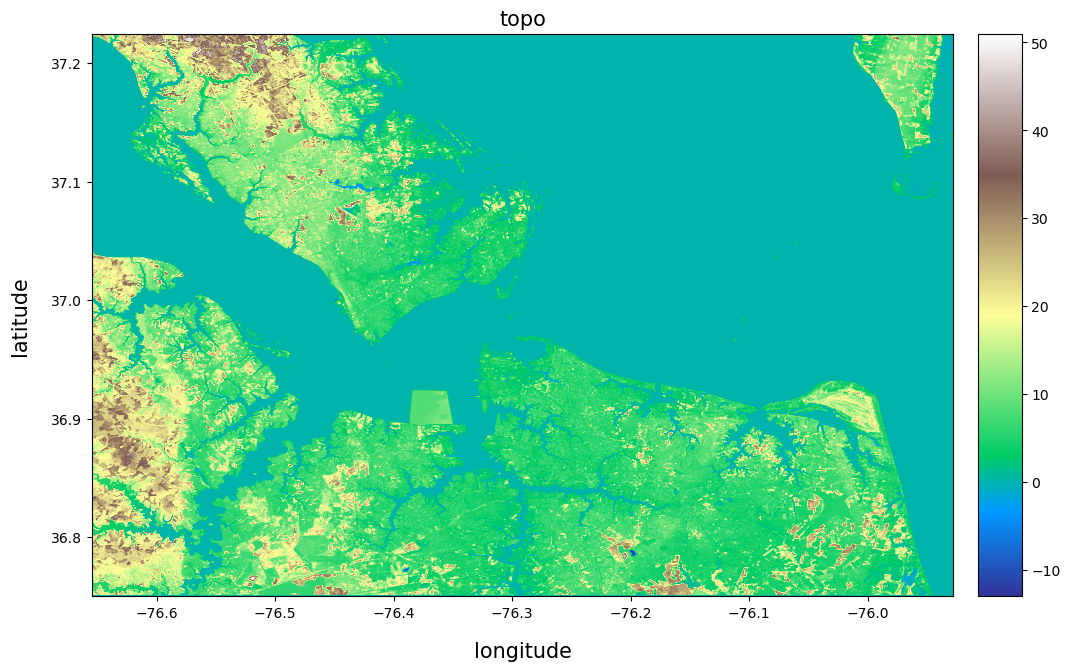

In [75]:
plot_layer('/Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/glo_90.dem',lay_type='topo')
#plot_layer('/Users/mtan/Documents/Data/SSA24/mintpy/14/DEM/glo_90.dem',lay_type='topo')

### e.) ariaTSsetup.py
#### time series preparation using Aria tools

issues:

- https://github.com/aria-tools/ARIA-tools/issues/187

In [48]:
#Attempt to batch process water mask and crop
!ariaTSsetup.py -f "/Users/mtan/Documents/Data/SSA24/mintpy/14/*.nc" --bbox "36.5185 39.7394 34.5586 40.8142" --mask download -w "/Users/mtan/Documents/Data/SSA24/mintpy/14/" -mo 15000 -v

/Users/mtan/miniconda3/envs/mintpy/bin/ariaTSsetup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
*****************************************************************
*** Time-series Preparation Function ***
*****************************************************************
Shapefile /Users/mtan/Documents/Data/SSA24/mintpy/14/user_bbox.json created for input user bounds
Multi-core version
All (3) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (1) interferograms are spatially continuous.
Thread count specified for gdal multiprocessing = 2
Download/cropping DEM
/Users/mtan/miniconda3/envs/mintpy/lib/python3.11/site-packages/dem_stitcher/stitcher.py:146: UserWarning: The directoryglo_90_tiles exists; We are writing new files to this directory
  warn(f"The directory{tile_dir} exi

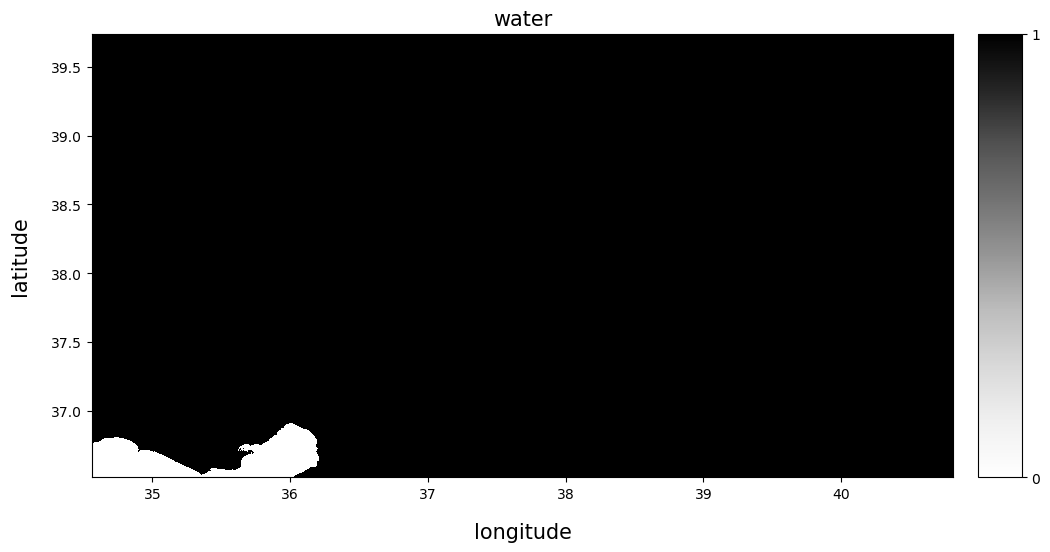

In [49]:
plot_layer('/Users/mtan/Documents/Data/SSA24/mintpy/14/mask/watermask.msk',lay_type='water')

In [78]:
#Extracting unwrapped phase, coherence, and connected components for each interferogram pair
#Extracting single incidence angle, look angle and azimuth angle files valid over common interferometric grid

#!ariaTSsetup.py -f '/Users/mtan/Documents/Data/SSA24/mintpy/14/*.nc' --bbox "36.5185 39.7394 34.5586 40.8142" -d "/Users/mtan/Documents/Data/SSA24/mintpy/14/DEM/glo_90.dem" --mask "/Users/mtan/Documents/Data/SSA24/mintpy/14/mask/watermask.msk" -w "/Users/mtan/Documents/Data/SSA24/mintpy/14" -v
!ariaTSsetup.py -f '/Users/mtan/Documents/Data/SSA24/mintpy/testdata/*.nc' --bbox "36.75 37.225 -76.655 -75.928" -d "/Users/mtan/Documents/Data/SSA24/mintpy/testdata/DEM/glo_90.dem" --mask "/Users/mtan/Documents/Data/SSA24/mintpy/testdata/mask/watermask.msk" -w "/Users/mtan/Documents/Data/SSA24/mintpy/testdata" -verbose

/Users/mtan/miniconda3/envs/mintpy/bin/ariaTSsetup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
ARIA-tools Version: 1.1.6
*****************************************************************
*** Time-series Preparation Function ***
*****************************************************************
Shapefile /Users/mtan/Documents/Data/SSA24/mintpy/testdata/user_bbox.json created for input user bounds
Multi-core version
All (12) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (12) interferograms are spatially continuous.
Thread count specified for gdal multiprocessing = 2
Download/cropping DEM

Extracting unwrapped phase, coherence, and connected components for each interferogram pair
Generating: unwrappedPhase - [==================================================] 20190325_20190313    4s /     0s 
Gen

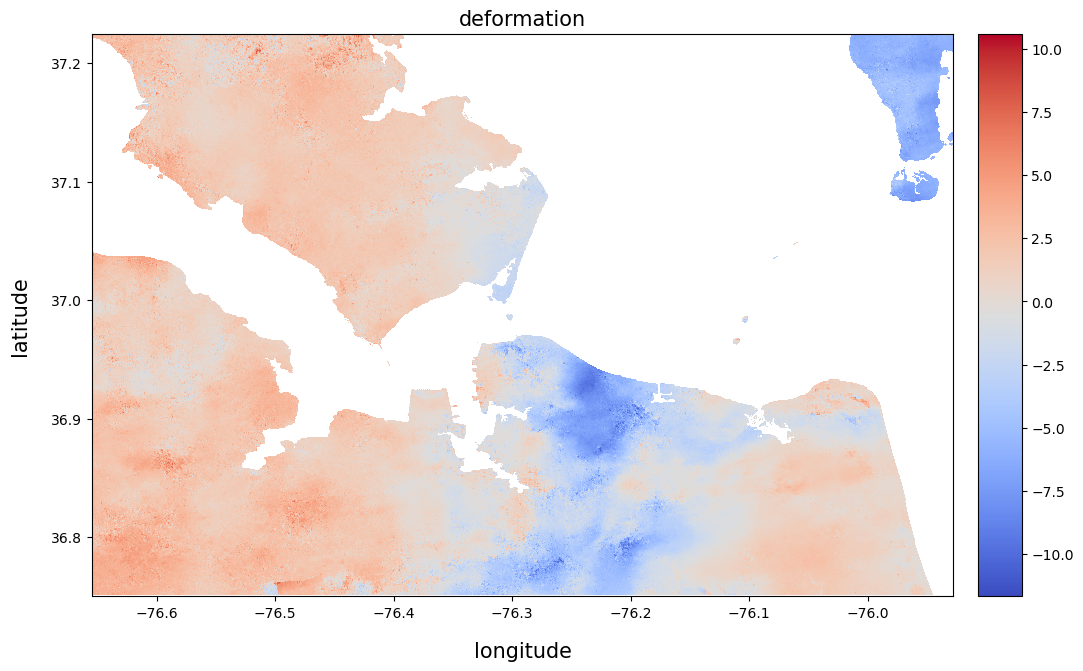

In [79]:
#plot_layer('/Users/mtan/Documents/Data/SSA24/mintpy/14/unwrappedPhase/20230221_20230209', 'deformation')
plot_layer('/Users/mtan/Documents/Data/SSA24/mintpy/testdata/unwrappedPhase/20190325_20190313', 'deformation')

In [80]:
#Examine stack files

#!ls /Users/mtan/Documents/Data/SSA24/mintpy/14/stack
#!gdalinfo /Users/mtan/Documents/Data/SSA24/mintpy/14/stack/unwrapStack.vrt

!ls /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack
!gdalinfo /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/unwrapStack.vrt

print("=====================")

cohStack.vrt      connCompStack.vrt unwrapStack.vrt


Driver: VRT/Virtual Raster
Files: /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/unwrapStack.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190124_20190112.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190217_20190112.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190217_20190124.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190301_20190112.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190301_20190124.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190301_20190217.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190313_20190124.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase/20190313_20190217.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/testdata/stack/../unwrappedPhase

In [56]:
!gdalinfo /Users/mtan/Documents/Data/SSA24/mintpy/14/stack/unwrapStack.vrt -mdd unwrappedPhase

Driver: VRT/Virtual Raster
Files: /Users/mtan/Documents/Data/SSA24/mintpy/14/stack/unwrapStack.vrt
       /Users/mtan/Documents/Data/SSA24/mintpy/14/stack/../unwrappedPhase/20230221_20230209.vrt
Size is 7508, 3866
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (34.558319509999997,39.739984104000001)
Pixel Size = (0.000833333000000,-0.000833333000000)
Corner Coordinates:
Upper Left  (  34.5583195,  39.7399841) ( 34d33'29.95"E, 39d44'23.94"N)
Lower Left  (  34.5583195,  36

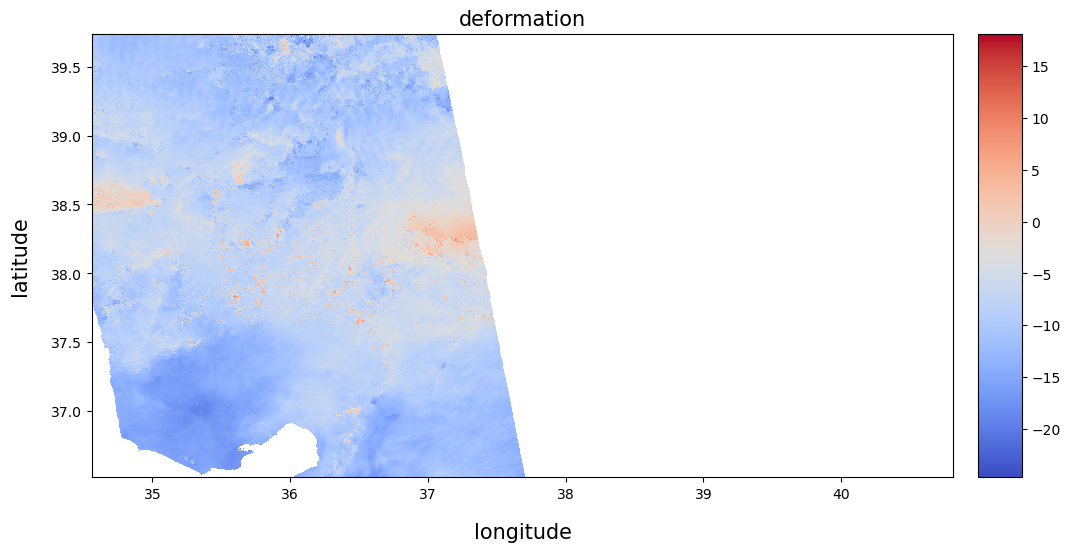

In [58]:
plot_layer('/Users/mtan/Documents/Data/SSA24/mintpy/14/stack/unwrapStack.vrt', 'deformation', n_bands=10)

### f.) prep_aria.py
#### prepare data for smallbaseline_app.py

In [64]:
!prep_aria.py --help

usage: prep_aria.py [-h] [-t TEMPLATE_FILE] [-o OUTFILE OUTFILE] [--update]
                    [--compression {lzf,gzip,None}] [-s STACKDIR] [-u UNWFILE]
                    [-c CORFILE] [-l CONNCOMPFILE] [--amp-stack-name MAGFILE]
                    [-d DEMFILE] [-i INCANGLEFILE] [-a AZANGLEFILE]
                    [-w WATERMASKFILE]

Prepare ARIA processed products for MintPy.

options:
  -h, --help            show this help message and exit
  -t TEMPLATE_FILE, --template TEMPLATE_FILE
                        template file with the options
  -o OUTFILE OUTFILE, --output OUTFILE OUTFILE
                        output HDF5 file
  --update              Enable the update mode: checking dataset already loaded.
  --compression {lzf,gzip,None}
                        HDF5 file compression, default: None

interferogram stack:
  -s STACKDIR, --stack-dir STACKDIR
                        The directory which contains stack VRT files.
  -u UNWFILE, --unwrap-stack-name UNWFILE
                 

## Option 2: ASF Hyp3
#### Data download from ASF Hyp3
> submit job via ASF Vertex site (takes a few hours to have one asc track ready to download)
##### *or*
> submit job via sdk python command (not included here)

In [8]:
#Import asf and hyp3 packages

import asf_search as asf
import hyp3_sdk as sdk

In [ ]:
#Check on status of Hyp3 job

hyp3 = sdk.HyP3()
rtc_jobs = hyp3.find_jobs(name='TR116_PA124')
rtc_jobs = hyp3.watch(rtc_jobs)

100%|██████████| 45/45 [timeout in 10800s]


In [ ]:
#Batch download the files in your job, specifying path

rtc_jobs.download_files('/Users/mtan/Documents/Data/SSA24/mintpy/116hyp3/', 'TR116_PA124')

S1A_IW_20230228T152607_DVP_RTC20_G_gpunem_61D6.zip: 100%|██████████| 1.82G/1.82G [03:03<00:00, 10.7MB/s]
S1A_IW_20230228T152633_DVP_RTC20_G_gpunem_1D7C.zip: 100%|██████████| 1.80G/1.80G [02:59<00:00, 10.7MB/s]
S1A_IW_20230312T152632_DVP_RTC20_G_gpunem_6255.zip: 100%|██████████| 1.80G/1.80G [03:07<00:00, 10.3MB/s]
S1A_IW_20230216T152632_DVP_RTC20_G_gpunem_9DD9.zip: 100%|██████████| 1.80G/1.80G [03:40<00:00, 8.74MB/s]
S1A_IW_20230312T152607_DVP_RTC20_G_gpunem_9AAC.zip: 100%|██████████| 1.82G/1.82G [03:07<00:00, 10.5MB/s]
S1A_IW_20230628T152636_DVP_RTC20_G_gpunem_8146.zip: 100%|██████████| 1.79G/1.79G [03:25<00:00, 9.37MB/s]
S1A_IW_20231119T152641_DVP_RTC20_G_gpunem_B0D7.zip: 100%|██████████| 1.79G/1.79G [03:00<00:00, 10.7MB/s]
S1A_IW_20230803T152640_DVP_RTC20_G_gpunem_6447.zip: 100%|██████████| 1.79G/1.79G [03:01<00:00, 10.6MB/s]
S1A_IW_20230405T152633_DVP_RTC20_G_gpunem_042B.zip: 100%|██████████| 1.80G/1.80G [03:03<00:00, 10.5MB/s]
S1A_IW_20231014T152616_DVP_RTC20_G_gpunem_0B2F.zip: 100

KeyboardInterrupt: 

In [9]:
def get_common_overlap(file_list: List[Union[str, Path]]) -> List[float]:
    """Get the common overlap of  a list of GeoTIFF files
    
    Arg:
        file_list: a list of GeoTIFF files
    
    Returns:
         [ulx, uly, lrx, lry], the upper-left x, upper-left y, lower-right x, and lower-right y
         corner coordinates of the common overlap
    """
    
    corners = [gdal.Info(str(dem), format='json')['cornerCoordinates'] for dem in file_list]

    ulx = max(corner['upperLeft'][0] for corner in corners)
    uly = min(corner['upperLeft'][1] for corner in corners)
    lrx = min(corner['lowerRight'][0] for corner in corners)
    lry = max(corner['lowerRight'][1] for corner in corners)
    return [ulx, uly, lrx, lry]

In [10]:
files = glob.glob('/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/**/*_dem.tif', recursive=True)

overlap = get_common_overlap(files)

In [11]:
print(overlap)

[275420.0, 4290860.0, 562580.0, 4061480.0]


In [12]:
def clip_hyp3_products_to_common_overlap(data_dir: Union[str, Path], overlap: List[float]) -> None:
    """Clip all GeoTIFF files to their common overlap
    
    Args:
        data_dir:
            directory containing the GeoTIFF files to clip
        overlap:
            a list of the upper-left x, upper-left y, lower-right-x, and lower-tight y
            corner coordinates of the common overlap
    Returns: None
    """

    
    files_for_mintpy = ['_water_mask.tif', '_corr.tif', '_unw_phase.tif', '_dem.tif', '_lv_theta.tif', '_lv_phi.tif']

    for extension in files_for_mintpy:
        #print(extension)

        #for file in data_dir.glob(f'*{extension}'):
        for file in glob.glob(os.path.join('/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/**/', f'*{extension}'), recursive=True):

            dst_file = Path(file).parent / f'{Path(file).stem}_clipped{Path(file).suffix}'

            gdal.Translate(destName=str(dst_file), srcDS=str(file), projWin=overlap)

In [13]:
work_dir = '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/'
clip_hyp3_products_to_common_overlap(work_dir, overlap)

In [40]:
def write_config_file(out_file, CONFIG_TXT, mode='a'): 
    """Write configuration files for MintPy to process ARIA sample products"""
    if not os.path.isfile(out_file) or mode == 'w':
        with open(out_file, "w") as fid:
            fid.write(CONFIG_TXT)
        print('write configuration to file: {}'.format(out_file))
    else:
        with open(out_file, "a") as fid:
            fid.write("\n" + CONFIG_TXT)
        print('add the following to file: \n{}'.format(CONFIG_TXT))

In [71]:
CONFIG_TXT = '''# vim: set filetype=cfg:
mintpy.load.processor        = hyp3
##---------interferogram datasets
mintpy.load.unwFile          = {work_dir}/*/*_unw_phase_clipped.tif
mintpy.load.corFile          = {work_dir}/*/*_corr_clipped.tif
##---------geometry datasets:
mintpy.load.demFile          = {work_dir}/*/*_dem_clipped.tif
mintpy.load.incAngleFile     = {work_dir}/*/*_lv_theta_clipped.tif
mintpy.load.azAngleFile      = {work_dir}/*/*_lv_phi_clipped.tif
mintpy.load.waterMaskFile    = {work_dir}/*/*_water_mask_clipped.tif
mintpy.troposphericDelay.method = no
'''
work_dir = '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/'
config_file = os.path.join(work_dir, 'mintpy_config_119.txt')
write_config_file(config_file, CONFIG_TXT, mode='w')

write configuration to file: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/mintpy_config_119.txt


#### Prepare_HyP3_InSAR_Stack_for_MintPy

In [13]:
from datetime import datetime, timedelta
import ipywidgets as widgets
from itertools import chain
import json
import requests
from tqdm.auto import tqdm

import pandas
from rasterio.warp import transform_bounds

from hyp3_sdk import Batch, HyP3

from IPython.display import Markdown
from IPython.display import display
from IPython.display import clear_output

%matplotlib widget

In [14]:
analysis_directory = '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119'

print(f"analysis_directory: {analysis_directory}")

analysis_directory: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119


In [45]:
for pattern in [".xml",".png",".kmz"]:
    unneeded_files = glob.glob(os.path.join(analysis_directory, f"*/*{pattern}"), recursive=True)
    for file in unneeded_files:
        os.unlink(file)

In [15]:
from typing import List, Union, Dict
from collections import Counter

def get_projection(img_path: Union[Path, str]) -> Union[str, None]:
    """
    Takes: a string or posix path to a product in a UTM projection

    Returns: the projection (as a string) or None if none found
    """
    img_path = str(img_path)
    try:
        info = gdal.Info(img_path, format='json')['coordinateSystem']['wkt']
    except KeyError:
        return None
    except TypeError:
        raise FileNotFoundError

    regex = 'ID\["EPSG",[0-9]{4,5}\]\]$'
    results = re.search(regex, info)
    if results:
        return results.group(0).split(',')[1][:-2]
    else:
        return None

def get_projections(tiff_paths: List[Union[Path, str]]) -> Dict:
    """
    Takes: List of string or posix paths to geotiffs
    
    Returns: Dictionary key: epsg, value: number of tiffs in that epsg 
    """
    epsgs = []
    for p in tiff_paths:
        epsgs.append(get_projection(p))

    epsgs = dict(Counter(epsgs))
    return epsgs

def get_res(tiff):
    tiff = str(tiff)
    f =  gdal.Open(tiff)
    return f.GetGeoTransform()[1] 

def get_no_data_val(pth):
    pth = str(pth)
    f = gdal.Open(str(pth))
    if f.GetRasterBand(1).DataType > 5:
        no_data_val = f.GetRasterBand(1).GetNoDataValue()
        return np.nan if no_data_val == None else f.GetRasterBand(1).GetNoDataValue()
    else:
        return 0

In [50]:
fnames = glob.glob('/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/*/*_clipped.tif', recursive=True)
fnames.sort()

In [51]:
fnames = glob.glob('/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/*/*.tif', recursive=True)
fnames.sort()
epsgs = get_projections(fnames)
predominant_epsg = None if len(epsgs) == 1 else max(epsgs, key=epsgs.get)

if predominant_epsg:
    for pth in fnames:
        src_SRS = get_projection(str(pth))
        res = get_res(pth)
        if src_SRS != predominant_epsg:
            res = get_res(pth)
            no_data_val = get_no_data_val(pth)
    
            temp = pth.parent/f"temp_{pth.stem}.tif"
            pth.rename(temp)

            warp_options = {
                "dstSRS":f"EPSG:{predominant_epsg}", "srcSRS":f"EPSG:{src_SRS}",
                "targetAlignedPixels":True,
                "xRes":res, "yRes":res,
                "dstNodata": no_data_val
            }
            gdal.Warp(str(pth), str(temp), **warp_options)
            os.unlink(temp)

In [66]:
!jupyter --paths

config:
    /Users/mtan/miniconda3/envs/mintpy/etc/jupyter
    /Users/mtan/.jupyter
    /Users/mtan/.local/etc/jupyter
    /usr/local/etc/jupyter
    /etc/jupyter
data:
    /Users/mtan/miniconda3/envs/mintpy/share/jupyter
    /Users/mtan/Library/Jupyter
    /Users/mtan/.local/share/jupyter
    /usr/local/share/jupyter
    /usr/share/jupyter
runtime:
    /Users/mtan/Library/Jupyter/runtime


[4053308.1265819827, 4393285.489916162, 4422108.296173951, 4688529.607225878]
[4053827.184695567, 4393548.601434253, 4421645.027029076, 4688272.20252309]


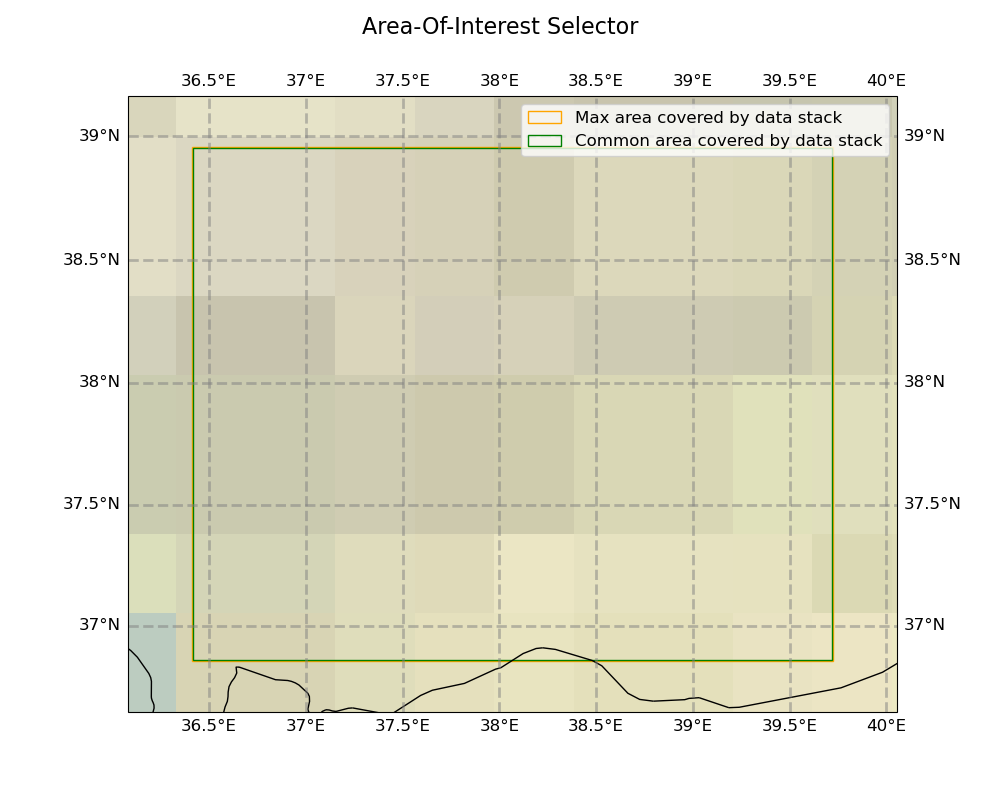

In [22]:
import ipympl
import ipywidgets as widgets
%matplotlib widget

amp = glob.glob('/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/*/*_??.tif', recursive=True)
max_extents = asfn.get_max_extents(amp)
xmin, ymin, xmax, ymax = transform_bounds(int(asfn.get_projection(str(amp[0]))), 3857, *max_extents)
max_extents = [xmin, ymin, xmax, ymax]

common_extents = asfn.get_common_coverage_extents(amp)
xmin, ymin, xmax, ymax = transform_bounds(int(asfn.get_projection(str(amp[0]))), 3857, *common_extents)
common_extents = [xmin, ymin, xmax, ymax]

print(max_extents)
print(common_extents)

aoi = asfn.AOI_Selector(max_extents, common_extents, figsize=(10, 8))

In [23]:
aoi.x1 = 277722
aoi.y1 = 4269430
aoi.x2 = 558766
aoi.y2 = 4085460

In [1]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.22.2
ipykernel        : 6.29.3
ipywidgets       : 7.8.0
jupyter_client   : 8.6.1
jupyter_core     : 5.7.2
jupyter_server   : 2.13.0
jupyterlab       : 4.1.5
nbclient         : 0.10.0
nbconvert        : 7.16.2
nbformat         : 5.10.3
notebook         : 7.1.2
qtconsole        : not installed
traitlets        : 5.14.2


In [8]:
!jupyter labextension list

JupyterLab v4.1.5
/Users/mtan/miniconda3/envs/mintpy/share/jupyter/labextensions
        jupyterlab_pygments v0.3.0 enabled OK (python, jupyterlab_pygments)
        jupyter-matplotlib v0.10.5 enabled OK
        @jupyter-notebook/lab-extension v7.1.2 enabled OK
        @jupyter-widgets/jupyterlab-manager v3.1.7 enabled  X (python, jupyterlab_widgets)


   The following extensions are outdated:
        @jupyter-widgets/jupyterlab-manager
        
   Consider checking if an update is available for these packages.


Build recommended, please run `jupyter lab build`:
    No built application


In [9]:
!jupyter --path

config:
    /Users/mtan/miniconda3/envs/mintpy/etc/jupyter
    /Users/mtan/.jupyter
    /Users/mtan/.local/etc/jupyter
    /usr/local/etc/jupyter
    /etc/jupyter
data:
    /Users/mtan/miniconda3/envs/mintpy/share/jupyter
    /Users/mtan/Library/Jupyter
    /Users/mtan/.local/share/jupyter
    /usr/local/share/jupyter
    /usr/share/jupyter
runtime:
    /Users/mtan/Library/Jupyter/runtime


In [24]:
try:
    xmin, ymin, xmax, ymax = transform_bounds(3857, 
                                          int(asfn.get_projection(str(amp[0]))), 
                                          *[aoi.x1, aoi.y1, aoi.x2, aoi.y2])
    ul = [xmin, ymax]
    lr = [xmax, ymin]
    print(f"AOI Corner Coordinates:")
    print(f"upper left corner: {ul}")
    print(f"lower right corner: {lr}")
except TypeError:
    print('TypeError')
    display(f'<text style=color:red>This error may occur if an AOI was not selected.</text>')
    display(f'<text style=color:red>Note that the square tool icon in the AOI selector menu is <b>NOT</b> the selection tool. It is the zoom tool.</text>')

AOI Corner Coordinates:
upper left corner: [-2928041.8106923234, 4638819.078209629]
lower right corner: [-2621982.4500183375, 4382804.693073086]


In [ ]:
fnames = list(analysis_directory.glob('*/*.tif'))
fnames.sort()

for i, fname in enumerate(fnames):
    clip = fname.parent/f"{fname.stem}_clip.tif"
    gdal.Translate(destName=str(clip), srcDS=str(fname), projWin=[ul[0], ul[1], lr[0], lr[1]])
    gdal.Warp(str(clip), str(clip), dstSRS='EPSG:4326', dstNodata=0)
    fname.unlink() 

In [ ]:
fnames = list(analysis_directory.glob('*/*.tif'))
fnames = [str(f) for f in fnames]
fnames.sort()

removed = []
for f in fnames:
    if not "dem" in str(f):
        raster = gdal.Open(f)
        if raster:
            band = raster.ReadAsArray()
            if np.count_nonzero(band) < 1:
                Path(f).unlink()
                removed.append(f)

if len(removed) == 0:
    print("No Geotiffs were removed")
else:
    print(f"{len(removed)} GeoTiffs removed:")
    for f in removed:
        print(f)

***
### smallbaseline_app.py
#### create time series

You can run every step in smallbaselineApp.py with one call, or individually:


>load_data

>modify_network

>reference_point

>quick_overview

>invert_network

>correct_troposphere

>correct_topography

>residual_RMS

>reference_date

>velocity

>google_earth


Skipped steps include:


>correct_unwrap_error

>correct_LOD

>correct_SET

>deramp

>hdfeos5

In [25]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil
from cartopy import crs as ccrs
from mintpy.utils import readfile, utils as ut, plot as pp
from mintpy.cli import view, tsview, plot_network, plot_transection
from mintpy.view import prep_slice, plot_slice
#from workflows import utils
plt.rcParams.update({'font.size': 12})

In [ ]:
# utils function
def write_config_file(out_file, CONFIG_TXT, mode='a'): 
    """Write configuration files for MintPy to process ARIA sample products"""
    if not os.path.isfile(out_file) or mode == 'w':
        with open(out_file, "w") as fid:
            fid.write(CONFIG_TXT)
        print('write configuration to file: {}'.format(out_file))
    else:
        with open(out_file, "a") as fid:
            fid.write("\n" + CONFIG_TXT)
        print('add the following to file: \n{}'.format(CONFIG_TXT))

In [71]:
#RUN ONLY IF YOU'RE USING ARIA-TOOLS
CONFIG_TXT = '''# vim: set filetype=cfg:
mintpy.load.processor      = aria  #[isce, aria, hyp3, gmtsar, snap, gamma, roipac], auto for isce
#---------interferogram datasets:
mintpy.load.unwFile        = ./stack/unwrapStack.vrt
mintpy.load.corFile        = ./stack/cohStack.vrt
mintpy.load.connCompFile   = ./stack/connCompStack.vrt
#---------geometry datasets:
mintpy.load.demFile        = ./DEM/glo_90.dem
mintpy.load.incAngleFile   = ./incidenceAngle/*.vrt
mintpy.load.azAngleFile    = ./azimuthAngle/*.vrt
mintpy.load.waterMaskFile  = ./mask/watermask.msk

mintpy.reference.lalo           = 37.69, -122.07
mintpy.troposphericDelay.method = no
mintpy.deramp                   = no
mintpy.topographicResidual      = no

# options to speedup the processing (fast but not the best)
mintpy.networkInversion.weightFunc           = no
mintpy.topographicResidual.pixelwiseGeometry = no
'''

config_file = os.path.join('/Users/mtan/Documents/Data/SSA24/mintpy/14/', "S1A_14.txt")
write_config_file(config_file, CONFIG_TXT, mode='w')

write configuration to file: /Users/mtan/Documents/Data/SSA24/mintpy/14/S1A_14.txt


In [3]:
pyaps_cfg = "/Users/mtan/.cdsapirc"
try:
    with open(pyaps_cfg, 'r') as f:
        lines = f.readlines()
        if len(lines) == 2 and 'url' in lines[0]:
            print("There was a CDS UID and API Key found in the pyaps3 config: ~/.cdsapirc")
            print("Would you like to update them?")
            update_cds_cfg = asfn.select_parameter(["Do not update CDS UID and API Key", 
                                                    "Update CDS UID and API Key"])
            display(update_cds_cfg)
        else:
            update_cds_cfg = None
except FileNotFoundError:
    update_cds_cfg = None

There was a CDS UID and API Key found in the pyaps3 config: ~/.cdsapirc
Would you like to update them?


RadioButtons(layout=Layout(min_width='800px'), options=('Do not update CDS UID and API Key', 'Update CDS UID a…

In [26]:
work_dir = '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/'
os.chdir(work_dir)
print('Go to work directory:', work_dir)

!smallbaselineApp.py mintpy_config_119.txt --dostep load_data

Go to work directory: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/
MintPy version 1.5.3, date 2023-11-23
--RUN-at-2024-03-21 16:36:36.067017--
Current directory: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: mintpy_config_119
Go to work directory: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119
read custom template file: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/mintpy_config_119.txt
update default template based on input custom template
No new option value found, skip updat

In [29]:
!smallbaselineApp.py --work-dir '/Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119/' mintpy_config_119.txt


___________________________________________________________

  /##      /## /##             /##     /#######
 | ###    /###|__/            | ##    | ##__  ##
 | ####  /#### /## /#######  /######  | ##  \ ## /##   /##
 | ## ##/## ##| ##| ##__  ##|_  ##_/  | #######/| ##  | ##
 | ##  ###| ##| ##| ##  \ ##  | ##    | ##____/ | ##  | ##
 | ##\  # | ##| ##| ##  | ##  | ## /##| ##      | ##  | ##
 | ## \/  | ##| ##| ##  | ##  |  ####/| ##      |  #######
 |__/     |__/|__/|__/  |__/   \___/  |__/       \____  ##
                                                 /##  | ##
                                                |  ######/
   Miami InSAR Time-series software in Python    \______/
          MintPy 1.5.3, 2023-11-23
___________________________________________________________

--RUN-at-2024-03-21 16:45:19.051442--
Current directory: /Users/mtan/Library/CloudStorage/OneDrive-DOI/data/mintpy/116hyp3/119
Run routine processing with smallbaselineApp.py on steps: ['load_data', 'modify_network'

In [27]:
!ls -l inputs

total 56
-rw-r--r--@ 1 mtan  GS\Domain Users    556 Mar 20 15:41 mintpy_config_119.txt
-rw-r--r--@ 1 mtan  GS\Domain Users  24113 Mar 20 16:02 smallbaselineApp.cfg


In [75]:
!info.py inputs/ifgramStack.h5 --date --num --compact

20230209_20230221	0


ifgramStack.h5: this file contains 6 dataset cubes and multiple metadata.

> unwrapPhase      - 3D array in size of (m, l, w) for unwrapped interferometric phases data cube in radians

> coherence        - 3D array in size of (m, l, w) for spatial coherence                data cube

> connectComponent - 3D array in size of (m, l, w) for connected commponents            data cube

> date             - 2D array in size of (m, 2) in YYYYMMDD format for the reference and secondary dates (1st and 2nd columns).

> bperp            - 1D array in size of (m,) in meters for perpendicular baselines (average value)

> dropIfgram       - 1D array in size of (m,) in boolean to indicate whether an interferogram is used for inversion or ignored

where m is the number of interferograms, l is the number of lines and w is the number 


***

geometryGeo.h5: this file contains geometrical datasets including height, incidence angle, azimuth angle, shadow layover mask, 

slant range distance and/or water mask.of columns.



In [83]:
!plot_network.py 'inputs/ifgramStack.h5' -t smallbaselineApp.cfg

read options from template file: smallbaselineApp.cfg
read temporal/spatial baseline info from file: inputs/ifgramStack.h5
open ifgramStack file: ifgramStack.h5
coherenceSpatialAvg.txt already exists, read it directly
calculating spatial mean of coherence in file inputs/ifgramStack.h5 ...
[==================================================] 1/1 
write average value in space into text file: coherenceSpatialAvg.txt
Traceback (most recent call last):
  File "/Users/mtan/miniconda3/envs/mintpy/bin/plot_network.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/mtan/miniconda3/envs/mintpy/lib/python3.11/site-packages/mintpy/cli/plot_network.py", line 170, in main
    plot_network(inps)
  File "/Users/mtan/miniconda3/envs/mintpy/lib/python3.11/site-packages/mintpy/plot_network.py", line 148, in plot_network
    inps = read_network_info(inps)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mtan/miniconda3/envs/mintpy/lib/python3.11/site-packages/mintpy/plot_ne